In [15]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Memuat dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

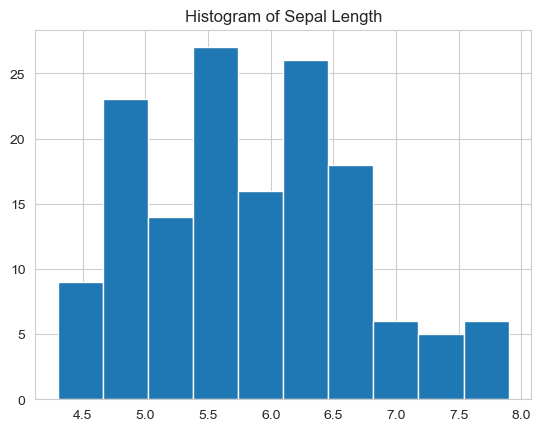

In [3]:
# Histogram
data[iris.feature_names[0]].hist()
plt.title('Histogram of Sepal Length')
plt.show()

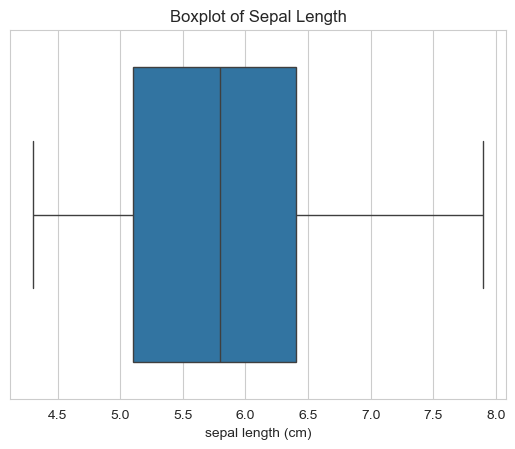

In [4]:
# Boxplot
sns.boxplot(x=data[iris.feature_names[0]])
plt.title('Boxplot of Sepal Length')
plt.show()

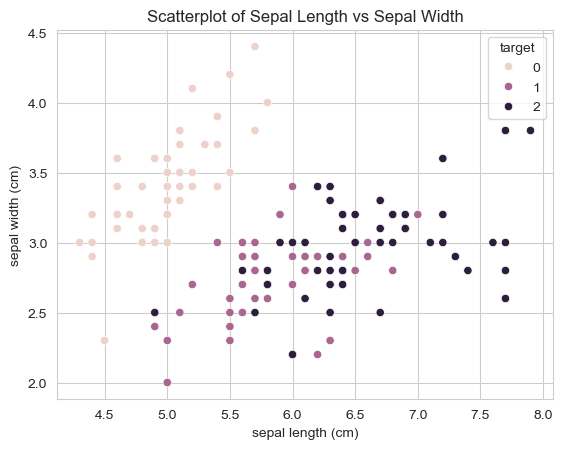

In [5]:
# Scatterplot
sns.scatterplot(x=data[iris.feature_names[0]], y=data[iris.feature_names[1]], hue=data['target'])
plt.title('Scatterplot of Sepal Length vs Sepal Width')
plt.show()

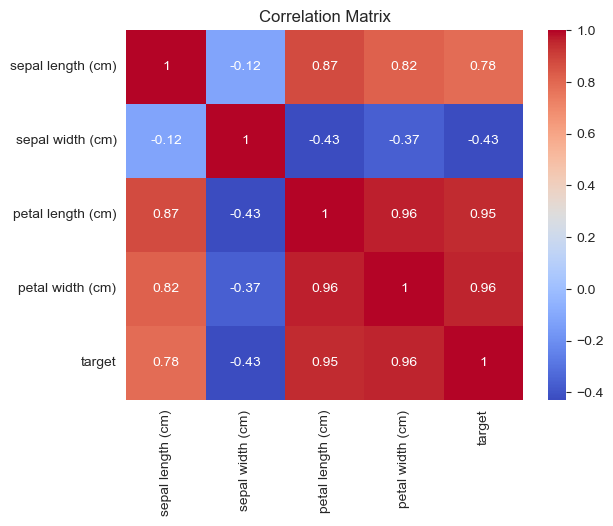

In [6]:
# Matriks Korelasi
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Contoh imputasi
imputer = SimpleImputer(strategy='mean')
data[iris.feature_names] = imputer.fit_transform(data[iris.feature_names])

In [10]:
# Menghapus Outlier berdasarkan IQR
for feature in iris.feature_names:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

In [14]:
# Normalisasi
scaler = MinMaxScaler()
data[iris.feature_names] = scaler.fit_transform(data[iris.feature_names])

In [16]:
# One-Hot Encoding
encoder = OneHotEncoder()
encoded_target = encoder.fit_transform(data[['target']])

In [17]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)